## Concordance Testing Groomed and Non-Groomed Output for Issue #140

In [4]:
%matplotlib inline
import matplotlib.pyplot as pyplot
import seaborn as sns
import pandas as pd
import numpy as np
from itertools import combinations

import os

In [24]:
ids = ["TH01_0713_S01", "TH01_0715_S01", "TH01_0717_S01"]

In [25]:
expression = {id: 
    {
     "groomed": pd.read_csv(
         "/treehouse/archive/downstream/{}/secondary/ucsc_cgl-rnaseq-cgl-pipeline-3.3.4-785eee9/RSEM/rsem_genes.results".format(id), sep='\t'),
     "nongroomed": pd.read_csv(
         "/treehouse/treeshop/downstream/{}/secondary/ucsc_cgl-rnaseq-cgl-pipeline-3.3.4-785eee9/RSEM/rsem_genes.results".format(id), sep='\t'),
    } for id in ids}

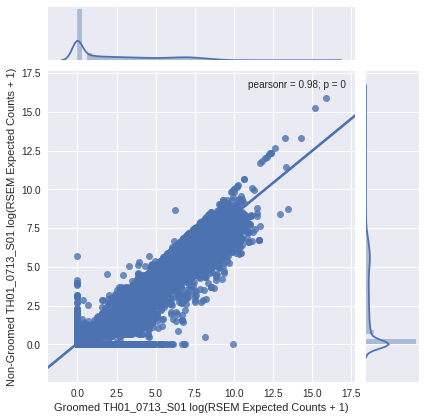

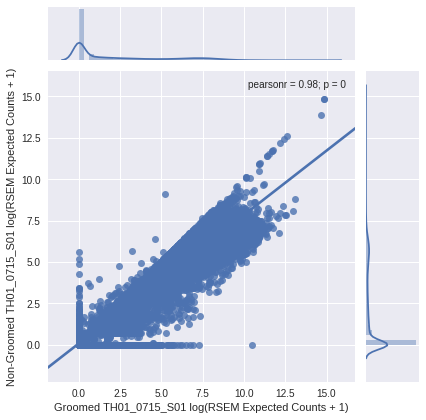

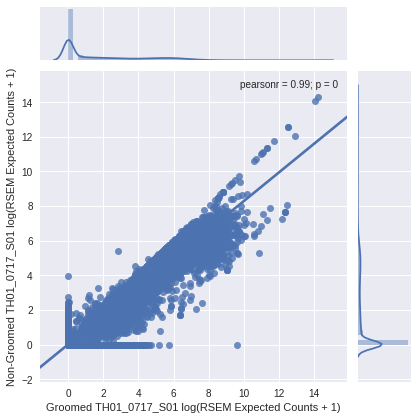

In [26]:
for id in expression.keys():
    sns.jointplot(expression[id]["groomed"].expected_count.apply(lambda x: np.log(x+1)),
                  expression[id]["nongroomed"].expected_count.apply(lambda x: np.log(x+1)), 
                  kind='reg')
    pyplot.xlabel("Groomed {} log(RSEM Expected Counts + 1)".format(id))
    pyplot.ylabel("Non-Groomed {} log(RSEM Expected Counts + 1)".format(id))
    pyplot.show()

In [31]:
for id in ids:
    print("{} sorted bam read count groomed".format(id))
    !samtools view -c /treehouse/archive/downstream/$id/secondary/ucsc_cgl-rnaseq-cgl-pipeline-3.3.4-785eee9/sorted.bam
    print("{} sorted bam read un-groomed".format(id))
    !samtools view -c /treehouse/treeshop/downstream/$id/secondary/ucsc_cgl-rnaseq-cgl-pipeline-3.3.4-785eee9/sorted.bam

TH01_0713_S01 sorted bam read count groomed
332212116
TH01_0713_S01 sorted bam read un-groomed
185912141
TH01_0715_S01 sorted bam read count groomed
271266975
TH01_0715_S01 sorted bam read un-groomed
106900595
TH01_0717_S01 sorted bam read count groomed
232270307
TH01_0717_S01 sorted bam read un-groomed
72189567


## A Deeper Look

Given the number of genes we're looking at, concordance testing will swallow up minute differences. Instead we'll take the difference between the expected count set and plot that.


In [93]:
for x, y in combinations(['2.0.8A', '2.0.8B'], 2):
    diff = np.array(rsem[x].expected_count) - np.array(rsem[y].expected_count)
    print x, y
    print 'Number of genes: ' + str(len(diff))
    print np.nonzero(diff)

2.0.8A 2.0.8B
Number of genes: 60498
(array([], dtype=int64),)


In [94]:
for x, y in combinations(['2.0.8A', '3.0.2'], 2):
    diff = np.array(rsem[x].expected_count) - np.array(rsem[y].expected_count)
    print x, y
    print 'Number of genes: ' + str(len(diff))
    print np.nonzero(diff)

2.0.8A 3.0.2
Number of genes: 60498
(array([    5,    32,    37, ..., 60203, 60332, 60339]),)
